In [528]:
from tensorflow.keras.utils import plot_model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import os
import numpy as np
# import tensorflow_probability as tfp
import tensorflow as tf

In [529]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)
    print(X_t[:5])
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud', s=2)
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud', s=2)
    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();

def plot_loss(hist):
    plt.plot(hist.history['loss'])
    # plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    # plt.yscale('log',basey=10)
    plt.show()

In [530]:
raw_data = pd.read_csv("creditcard.csv")
raw_data.head()

In [ ]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
raw_data.loc[:,'Time'] = raw_data['Time'].apply(lambda x : x / 3600 % 24)

In [ ]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,14.537951,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,5.847061,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,10.598194,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,15.010833,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,19.329722,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,23.999444,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


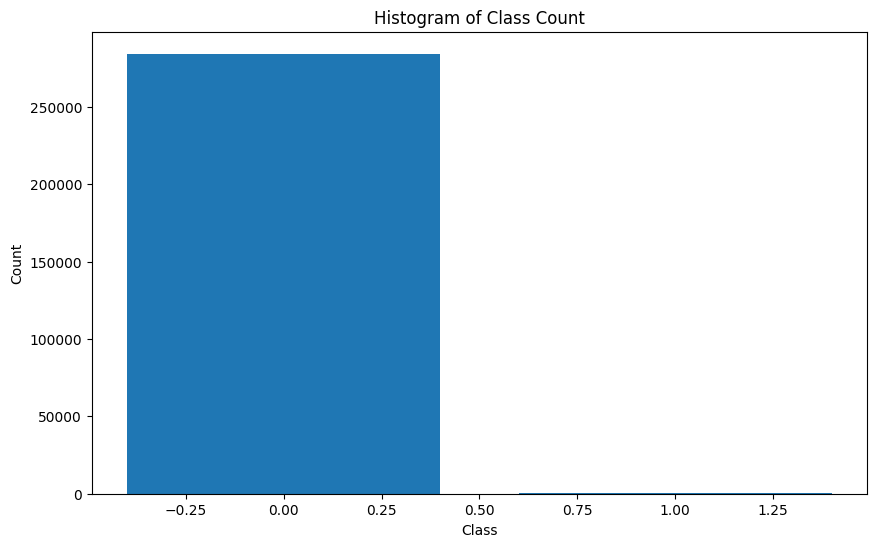

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'class' is the column name containing the classes
class_counts = raw_data['Class'].value_counts()
print(class_counts)
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class Count')
plt.show()


In [ ]:
nonfraud = raw_data[raw_data['Class']==0].sample(1000)
fraud = raw_data[raw_data['Class']==1]

print(nonfraud.shape , fraud.shape)

df = pd.concat([nonfraud,fraud]).sample(frac=1).reset_index(drop=True)




# final = np.concatenate([nonfraud,fraud])
Y = df['Class']
final1 = df.drop(['Class'],axis=1)


final1.shape

(1000, 31) (492, 31)


(1492, 30)

[[  7.7952824   11.904121  ]
 [  5.609778    -7.2096343 ]
 [ 49.62249      9.670845  ]
 [ 32.770943   -31.03316   ]
 [ 14.494775    -0.60762566]]


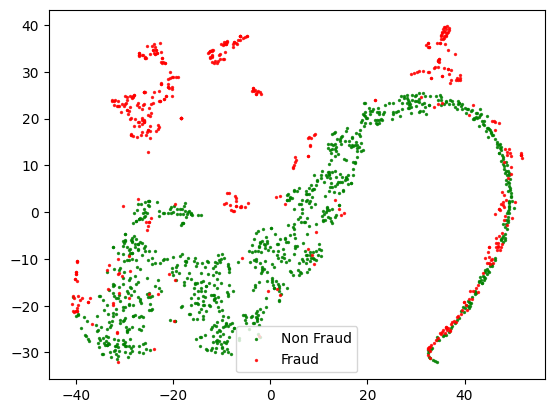

In [ ]:

tsne_plot(final1 ,Y)

In [ ]:
y = raw_data['Class']
rawdata = raw_data.drop(["Class"],axis=1)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
data, data_test ,y_train,y_test= train_test_split(rawdata,y, test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data_test = scaler.transform(data_test)


In [ ]:
data1 = pd.DataFrame(data)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.829130,1.085177,0.008793,-1.150952,0.060505,0.444800,-0.402639,0.182937,-0.250181,0.492005,...,-0.196107,0.271892,1.018994,-0.093849,0.223627,0.769264,-0.215115,-0.051890,-0.171237,-0.341703
1,1.193307,-0.403765,-0.235181,1.775028,-0.589312,-0.290841,0.613429,0.013370,-0.038621,-0.706468,...,-0.488578,-0.064758,0.827143,-0.298055,-0.566571,-0.539789,-0.928603,-0.629789,-0.872963,-0.005525
2,-2.292517,0.968177,-0.025037,-1.100685,0.579760,0.006680,-1.119454,0.149436,-0.343660,1.907952,...,-0.234824,0.104235,0.537388,-0.097597,-0.193258,0.286048,-0.303123,-0.131900,-0.080108,-0.016777
3,0.164379,0.584811,-0.921043,-0.185216,-2.110900,-0.819144,-0.277267,-0.502468,-0.068397,0.675400,...,-0.125794,-0.187080,-0.167117,-0.591533,-1.368379,1.245527,-1.347411,0.177183,0.116979,0.323878
4,-1.453301,-0.261601,-0.292724,0.445947,-1.313082,-0.092587,0.298671,-0.233479,0.007251,0.576890,...,-0.220947,0.520286,1.893551,0.051893,0.330427,-1.914648,-0.620817,0.102756,0.705430,0.045427


In [ ]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,...,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05
mean,-2.871211e-16,-3.313959e-18,5.987580e-19,1.649911e-17,1.907709e-17,1.753862e-17,1.513527e-17,5.904419e-19,5.987580e-19,8.266186e-18,...,-2.744307e-18,-1.862803e-18,-3.501071e-18,5.754729e-18,-8.815048e-19,-1.390449e-17,-1.047826e-17,-3.326433e-18,3.492755e-18,-4.540581e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.485649e+00,-2.868709e+01,-4.385712e+01,-3.179283e+01,-4.015175e+00,-8.216604e+01,-1.962393e+01,-3.505508e+01,-6.106432e+01,-1.223349e+01,...,-7.006362e+01,-4.726193e+01,-1.506886e+01,-5.907269e+01,-4.681556e+00,-1.665514e+01,-5.401412e+00,-5.540920e+01,-4.591281e+01,-3.487949e-01
25%,-6.727468e-01,-4.668430e-01,-3.621574e-01,-5.863703e-01,-5.989503e-01,-5.002874e-01,-5.772785e-01,-4.459974e-01,-1.741144e-01,-5.857586e-01,...,-2.709575e-01,-3.097886e-01,-7.464523e-01,-2.608836e-01,-5.872906e-01,-6.077131e-01,-6.776754e-01,-1.729759e-01,-1.581522e-01,-3.270038e-01
50%,8.059047e-02,1.053715e-02,3.843015e-02,1.188652e-01,-1.543738e-02,-3.919020e-02,-2.067634e-01,3.201256e-02,1.908576e-02,-4.702340e-02,...,-7.894052e-02,-3.979832e-02,9.805351e-03,-1.794266e-02,6.626833e-02,3.098001e-02,-1.058774e-01,4.338644e-03,3.268549e-02,-2.616700e-01
75%,8.201055e-01,6.695196e-01,4.844163e-01,6.764786e-01,5.227112e-01,4.433729e-01,2.982468e-01,4.591696e-01,2.735262e-01,5.444810e-01,...,1.727848e-01,2.519871e-01,7.283485e-01,2.374327e-01,7.267270e-01,6.722044e-01,5.004660e-01,2.252345e-01,2.322791e-01,-4.371884e-02
max,1.618187e+00,1.248677e+00,1.330164e+01,6.174849e+00,1.192037e+01,2.513930e+01,5.498407e+01,9.705191e+01,1.668629e+01,1.419915e+01,...,5.068337e+01,3.691191e+01,1.447628e+01,3.629435e+01,7.561282e+00,1.440583e+01,7.293956e+00,7.762550e+01,1.007135e+02,1.014403e+02


In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.829130,1.085177,0.008793,-1.150952,0.060505,0.444800,-0.402639,0.182937,-0.250181,0.492005,...,-0.196107,0.271892,1.018994,-0.093849,0.223627,0.769264,-0.215115,-0.051890,-0.171237,-0.341703
1,1.193307,-0.403765,-0.235181,1.775028,-0.589312,-0.290841,0.613429,0.013370,-0.038621,-0.706468,...,-0.488578,-0.064758,0.827143,-0.298055,-0.566571,-0.539789,-0.928603,-0.629789,-0.872963,-0.005525
2,-2.292517,0.968177,-0.025037,-1.100685,0.579760,0.006680,-1.119454,0.149436,-0.343660,1.907952,...,-0.234824,0.104235,0.537388,-0.097597,-0.193258,0.286048,-0.303123,-0.131900,-0.080108,-0.016777
3,0.164379,0.584811,-0.921043,-0.185216,-2.110900,-0.819144,-0.277267,-0.502468,-0.068397,0.675400,...,-0.125794,-0.187080,-0.167117,-0.591533,-1.368379,1.245527,-1.347411,0.177183,0.116979,0.323878
4,-1.453301,-0.261601,-0.292724,0.445947,-1.313082,-0.092587,0.298671,-0.233479,0.007251,0.576890,...,-0.220947,0.520286,1.893551,0.051893,0.330427,-1.914648,-0.620817,0.102756,0.705430,0.045427


In [ ]:
y_train.shape , y_test.shape

((213605,), (71202,))

In [ ]:
data.shape , data_test.shape

((213605, 30), (71202, 30))

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
input = tf.keras.layers.Input(shape=(30,))

x = tf.keras.layers.Dense(20,activation="relu")(input)
x = tf.keras.layers.Dense(10,activation="relu")(x)
x = tf.keras.layers.Dense(8,activation="relu")(x)

mu = tf.keras.layers.Dense(2)(x)
log_var = tf.keras.layers.Dense(2)(x)


def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = tf.keras.layers.Lambda(sampling)([mu, log_var])

decoder_input = tf.keras.layers.Input(shape=(2,))
x1 = tf.keras.layers.Dense(10,activation="relu")(decoder_input)
x1 = tf.keras.layers.Dense(20,activation="relu")(x1)
x1 = tf.keras.layers.Dense(30,activation="sigmoid")(x1)



model1 = tf.keras.Model(inputs=input, outputs=[mu,log_var,z])
model2 = tf.keras.Model(inputs=decoder_input, outputs=x1)

out = model2(model1(input)[2])

model = tf.keras.Model(inputs=input, outputs=out)


In [ ]:
model1.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 dense_68 (Dense)            (None, 20)                   620       ['input_18[0][0]']            
                                                                                                  
 dense_69 (Dense)            (None, 10)                   210       ['dense_68[0][0]']            
                                                                                                  
 dense_70 (Dense)            (None, 8)                    88        ['dense_69[0][0]']            
                                                                                           

In [ ]:
model2.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_73 (Dense)            (None, 10)                30        
                                                                 
 dense_74 (Dense)            (None, 20)                220       
                                                                 
 dense_75 (Dense)            (None, 30)                630       
                                                                 
Total params: 880 (3.44 KB)
Trainable params: 880 (3.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 30)]              0         
                                                                 
 model_24 (Functional)       [(None, 2),               954       
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 model_25 (Functional)       (None, 30)                880       
                                                                 
Total params: 1834 (7.16 KB)
Trainable params: 1834 (7.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import binary_crossentropy

def vae_r_loss(y_true, y_pred):
    r_loss = K.mean(K.square(y_true - y_pred))
    print(r_loss.shape)
    return r_loss

def vae_loss(y_true, y_pred):
    r_loss = vae_r_loss(y_true, y_pred)
    kl_loss = -0.5 * K.sum(1 + log_var - K.square(mu) - K.exp(log_var), axis = 1)
    return (r_loss + kl_loss)/2

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
# data_train = data.reshape(-1,data.shape[1])
# data_train2 = np.expand_dims(data, axis=0)
# data_train2.shape
# y_train1 = np.expand_dims(y_train, axis=0)
# y_train1.shape

In [ ]:

hist = model.fit(data,data,epochs=10)

Epoch 1/10
6676/6676 [==============================] - 9s 1ms/step - loss: 0.8887
Epoch 2/10
6676/6676 [==============================] - 6s 946us/step - loss: 0.8881
Epoch 3/10
6676/6676 [==============================] - 11s 2ms/step - loss: 0.8875
Epoch 4/10
6676/6676 [==============================] - 12s 2ms/step - loss: 0.8870
Epoch 5/10
6676/6676 [==============================] - 11s 2ms/step - loss: 0.8863
Epoch 6/10
6676/6676 [==============================] - 10s 1ms/step - loss: 0.8860
Epoch 7/10
6676/6676 [==============================] - 13s 2ms/step - loss: 0.8855
Epoch 8/10
6676/6676 [==============================] - 11s 2ms/step - loss: 0.8849
Epoch 9/10
6676/6676 [==============================] - 12s 2ms/step - loss: 0.8850
Epoch 10/10
6676/6676 [==============================] - 11s 2ms/step - loss: 0.8839


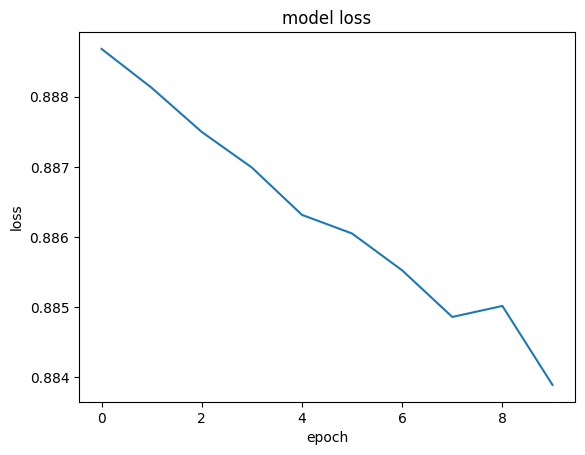

In [ ]:
plot_loss(hist)

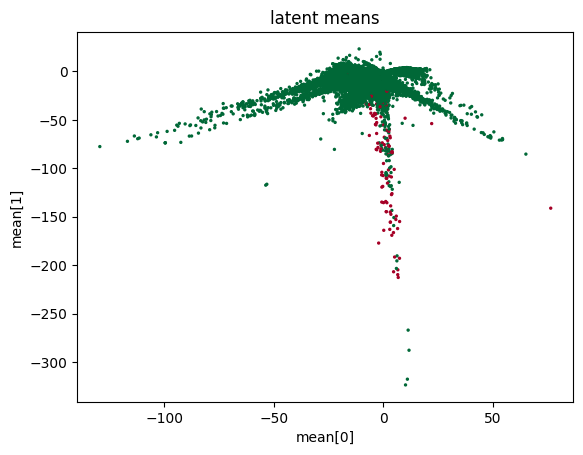

In [ ]:
latent_x_mean = model1(data_test)[0]
plt.scatter(latent_x_mean[:, 0], latent_x_mean[:, 1], c=y_test, cmap='RdYlGn_r', s=2)
plt.title('latent means')
plt.ylabel('mean[1]')
plt.xlabel('mean[0]')
plt.show()
# tsne_plot(latent_x_mean, y_test, "raw.png")

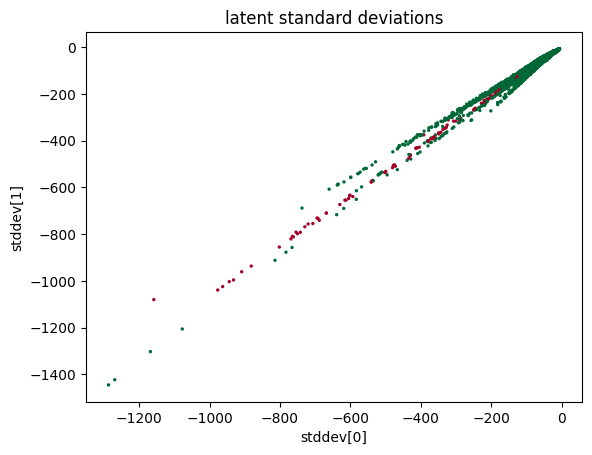

In [ ]:
latent_x_std = model1(data_test)[1]
plt.scatter(latent_x_std[:, 0], latent_x_std[:, 1], c=y_test, cmap='RdYlGn_r', s=2)
plt.title('latent standard deviations')
plt.ylabel('stddev[1]')
plt.xlabel('stddev[0]')
plt.show()

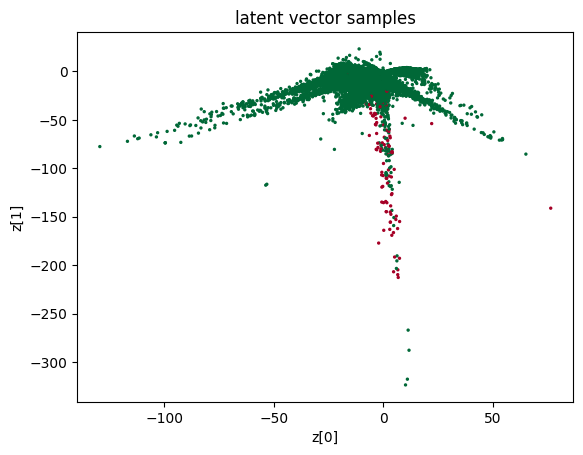

In [ ]:
latent_x = model1(data_test)[2]
plt.scatter(latent_x[:, 0], latent_x[:, 1], c=y_test, cmap='RdYlGn_r', s=2)
plt.title('latent vector samples')
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()